# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#### Se cargan los dataset que se eligieron de Accesos a Internet que estan en la pagina https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/

In [5]:
df_banda_ancha_dial_up = pd.read_csv('Data\Banda ancha y dial up periodo.csv')
df_accesos_por_tecnologia = pd.read_csv('Data\Internet_Accesos-por-tecnologia x prov.csv')
df_accesos_por_velocidad = pd.read_csv('Data\Internet_Accesos-por-velocidad.csv')
df_ingresos = pd.read_csv('Data\Internet_Ingresos.csv')
df_acceso_por_hogares = pd.read_csv('Data\Acceso a internet por cada 100 hogares.csv', delimiter= ";")
df_penetracion_por_habitante = pd.read_csv('Data\Internet_Penetracion x habitante.csv', delimiter= ";")


FileNotFoundError: [Errno 2] No such file or directory: 'Banda ancha y dial up periodo.csv'

#### Primera vista a los dataset 

In [7]:
df_banda_ancha_dial_up.head()

,Year,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [6]:
df_banda_ancha_dial_up.describe()

,Year,Trimestre,Dial up
count,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,23.383371
std,2.564135,1.120474,10.087397
min,2014.000000,1.000000,9.991000
25%,2016.000000,1.500000,12.436500
50%,2018.000000,2.000000,26.911000
75%,2020.000000,3.000000,32.508500
max,2022.000000,4.000000,39.324000


In [8]:
df_banda_ancha_dial_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [10]:
df_banda_ancha_dial_up.shape

(35, 6)

In [18]:
df_accesos_por_tecnologia.head()

,Year,Trimestre,Provincia,ADSL,Cablemodem,Fibra Optica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [17]:
df_accesos_por_tecnologia.tail() #quiero saber desde que año empiezan a considerarse los datos

,Year,Trimestre,Provincia,ADSL,Cablemodem,Fibra Optica,Wireless,Otros,Total
836,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
837,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038
839,2014,1,Tucuman,129.717,83,121,13.000,98.000,130.032
840,"*,""Los datos provinciales no coinciden a nivel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_accesos_por_tecnologia.describe()

,Wireless,Otros
count,840.000000,840.000000
mean,58.571726,102.303848
std,158.016953,207.118151
min,0.000000,1.007000
25%,3.437500,2.934000
50%,8.186500,15.267000
75%,26.024500,47.000000
max,952.000000,987.000000


In [13]:
df_accesos_por_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          841 non-null    object 
 1   Trimestre     840 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra Optica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


##### Se toma en cuenta que en el caso de las columnas ADSL , Cablemodem  y total estan como dtype object por lo tanto se debera hacer la transformacion a float antes de graficar 

In [14]:
df_accesos_por_tecnologia.shape

(841, 9)

In [19]:
df_accesos_por_velocidad.head()

,Year,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [20]:
df_accesos_por_velocidad.describe()

,Year,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,834.000000
mean,2017.885714,2.457143,126.009998,101.790393,71.417265,79.988627,100.758158,32.937064
std,2.528745,1.105009,187.578607,207.396126,140.324223,170.586599,208.683467,128.937905
min,2014.000000,1.000000,1.007000,0.000000,0.000000,0.000000,0.000000,-1.945000
25%,2016.000000,1.000000,10.000000,3.362500,5.357250,4.872000,2.019000,0.000000
50%,2018.000000,2.000000,50.000000,8.788000,20.157000,14.965500,11.251500,0.000000
75%,2020.000000,3.000000,134.000000,84.340500,62.225500,55.093000,64.286250,7.497750
max,2022.000000,4.000000,998.000000,999.000000,917.000000,978.000000,997.000000,923.000000


In [21]:
df_accesos_por_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


##### Se toma en cuenta que en el caso de las columnas + 1 Mbps - 6 Mbps , + 30 Mbps y total estan como dtype object por lo tanto se debera hacer la transformacion a float antes de graficar 

In [22]:
df_accesos_por_velocidad.shape

(840, 12)

In [23]:
df_ingresos.head()

,Year,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [24]:
df_ingresos.describe()

,Year,Trimestre
count,35.000000,35.000000
mean,2017.885714,2.457143
std,2.564135,1.120474
min,2014.000000,1.000000
25%,2016.000000,1.500000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [25]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [26]:
df_ingresos.shape

(35, 4)

In [27]:
df_acceso_por_hogares.head()

,Year,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [28]:
df_acceso_por_hogares.describe()

,Year,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


In [29]:
df_acceso_por_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [30]:
df_acceso_por_hogares.shape

(840, 4)

In [31]:
df_penetracion_por_habitante.head()

,Year,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,76.64,23.95,Jul-Sept 2022
1,2022,2,75.97,23.72,Abr-Jun 2022
2,2022,1,73.88,23.05,Ene-Mar 2022
3,2021,4,73.18,22.81,Oct-Dic 2021
4,2021,3,70.58,21.98,Jul-Sept 2021


In [32]:
df_penetracion_por_habitante.describe()

,Year,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,60.275429,18.606286
std,2.564135,1.120474,8.148909,2.662968
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.500000,52.985000,16.245000
50%,2018.000000,2.000000,59.160000,18.240000
75%,2020.000000,3.000000,66.050000,20.475000
max,2022.000000,4.000000,76.640000,23.950000


In [33]:
df_penetracion_por_habitante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [34]:
df_penetracion_por_habitante.shape

(35, 5)

#### Un pequeño resumen de lo que se encontro en el primer analisis: 
- df_banda_ancha_dial_up: explora a nivel nacional cuantos accesos hubo a ba y cuantos a dial up.
- df_accesos_por_tecnologia: este dataset describe los tipos de tecnologias por provincia.
- df_accesos_por_velocidad:por provincia cuantos accesos por rango de velocidad.
- df_ingresos:Ingresos trimestrales de los operadores por el servicio de Internet fijo en pesos argentinos.s la colum
- df_acceso_por_hogares:por año y por provincia cuantos accesos cada 100 hogares.
-df_penetracion_por_habitante: a nivel nacional por hogar y por habitante la penetracion de internet.
* Todos los Datasets tienen el mismo rango de años: el valor minimo es 2014 y el maximo 2022
* La unica columna que tienen en comun todos ena Year
* Se deben realizar algunas transformaciones de tipos de datos antes de graficar 



## Análisis gráfico

### Comportamiento del acceso a internet por hogar

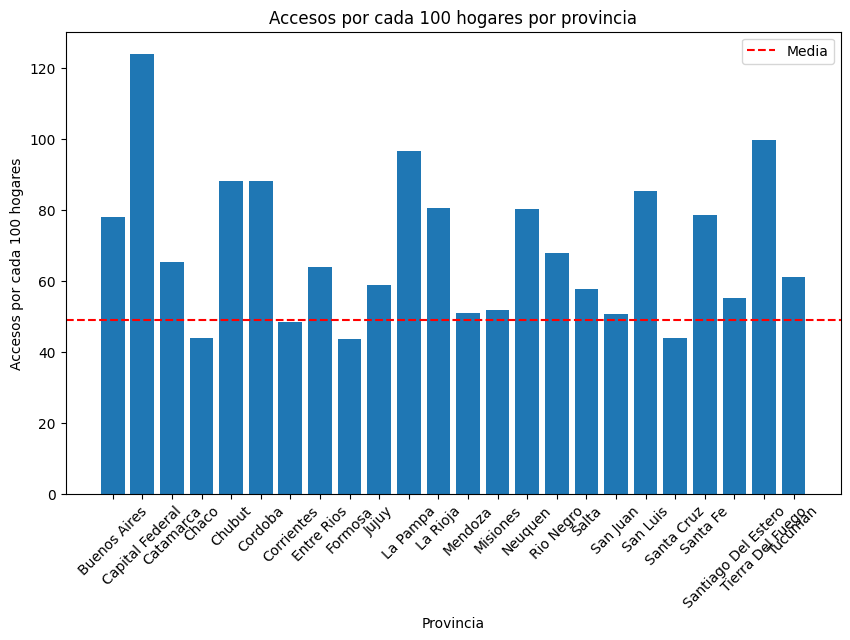

In [58]:
#Muestra el grafico los datos del tercer trimestre de 2022 por provincia y la media
import matplotlib.pyplot as plt

# Calcular la media
media = df_acceso_por_hogares['Accesos por cada 100 hogares'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_acceso_por_hogares['Provincia'], df_acceso_por_hogares['Accesos por cada 100 hogares'])
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos por cada 100 hogares por provincia')
plt.xticks(rotation=45)

# Agregar la línea de la media
plt.axhline(media, color='red', linestyle='--', label='Media')

plt.legend()  # Agregar leyenda
plt.show()

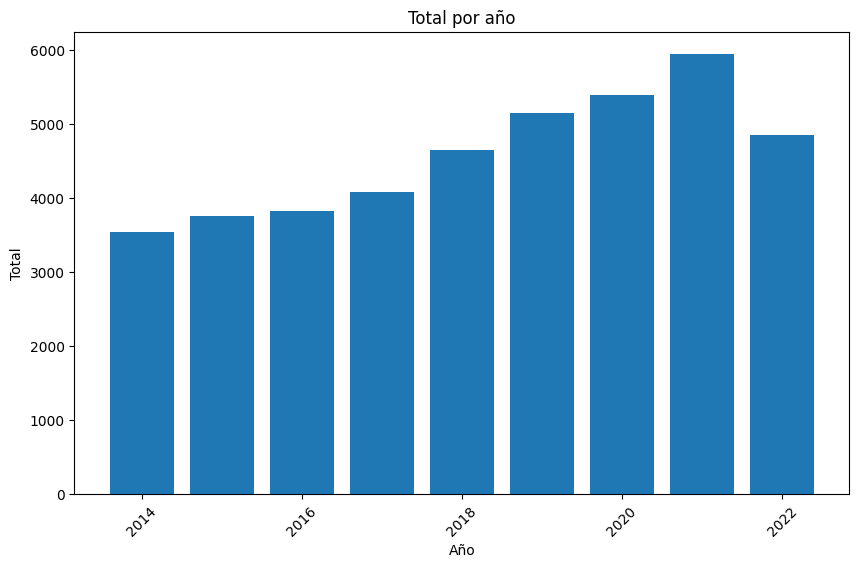

In [61]:
# Agrupamos por año los accesos cada 100 hogares 

import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y sumar los valores por año
df_agrupado = df_acceso_por_hogares.groupby('Year')['Accesos por cada 100 hogares'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_agrupado['Year'], df_agrupado['Accesos por cada 100 hogares'])
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Total por año')
plt.xticks(rotation=45)
plt.show()


#### Se verifica que a partir del año 2018 hay un aumento significativo de los accesos a internet en los hogares , sigue la tendencia en alza en 2019 y 2020 pero el mayor salto se produce en 2021 y luego decrece en 2022. El aumento mas significativo puede deberse a la pandemia, ya que la virtualidad genero que la mayoria de las actividades se realicen via internet. Luego en 2022  ya comenzaron a quitarse las mayores restricciones y eso podria explicar la tendencia de crecimiento en baja.

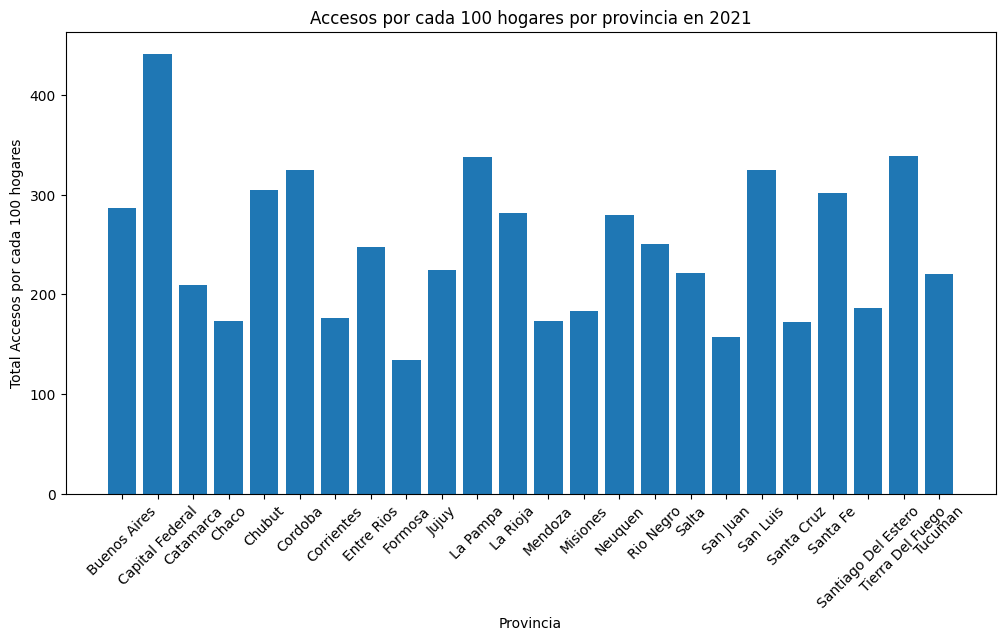

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para el año 2021
df_2021 = df_acceso_por_hogares[df_acceso_por_hogares['Year'] == 2021]

# Agrupar y sumar los valores por provincia
df_agrupado = df_2021.groupby('Provincia')['Accesos por cada 100 hogares'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_agrupado['Provincia'], df_agrupado['Accesos por cada 100 hogares'])
plt.xlabel('Provincia')
plt.ylabel('Total Accesos por cada 100 hogares')
plt.title('Accesos por cada 100 hogares por provincia en 2021')
plt.xticks(rotation=45)
plt.show()


#### Si tomamos solo el 2021 que fue el año de mas crecimiento podemos ver que las provincias que mas lideraron esa tencia fueron : Capital Federal, La Pampa, Tierra del Fuego, Cordoba y Chubut 

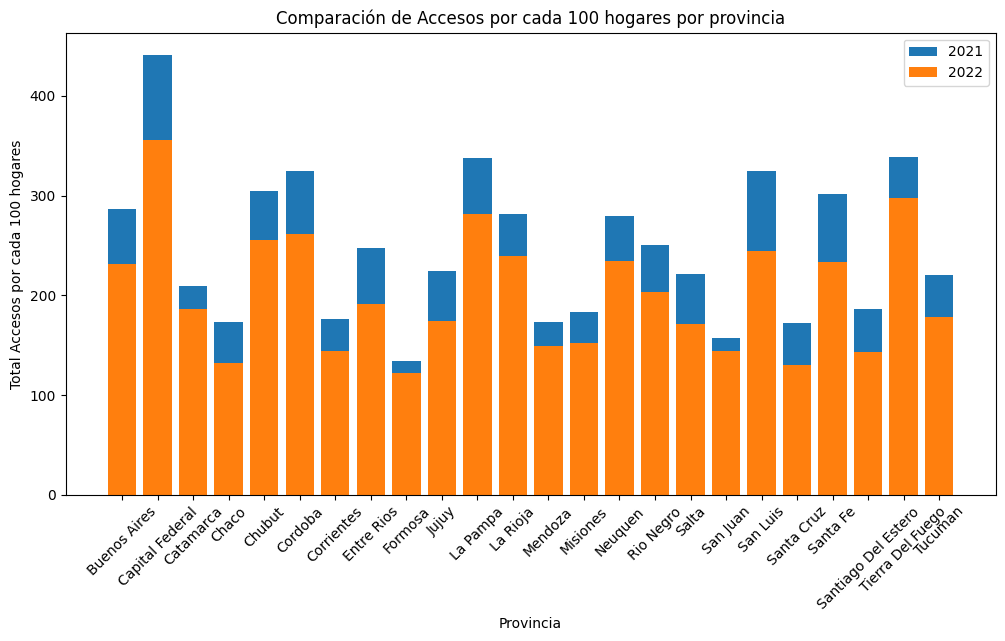

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para el año 2021
df_2021 = df_acceso_por_hogares[df_acceso_por_hogares['Year'] == 2021]
df_agrupado_2021 = df_2021.groupby('Provincia')['Accesos por cada 100 hogares'].sum().reset_index()

# Filtrar los datos para el año 2022
df_2022 = df_acceso_por_hogares[df_acceso_por_hogares['Year'] == 2022]
df_agrupado_2022 = df_2022.groupby('Provincia')['Accesos por cada 100 hogares'].sum().reset_index()

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 6))

# Barra para el año 2021
ax.bar(df_agrupado_2021['Provincia'], df_agrupado_2021['Accesos por cada 100 hogares'], label='2021')

# Barra para el año 2022
ax.bar(df_agrupado_2022['Provincia'], df_agrupado_2022['Accesos por cada 100 hogares'], label='2022')

# Personalizar el gráfico
ax.set_xlabel('Provincia')
ax.set_ylabel('Total Accesos por cada 100 hogares')
ax.set_title('Comparación de Accesos por cada 100 hogares por provincia')
ax.tick_params(axis='x', rotation=45)
ax.legend()

# Mostrar el gráfico
plt.show()


#### Si lo comparamos con el 2022 vemos que en todas las provincias hay una caida en el acceso a internet, esto se puede dar por dos factores: el primero que mencionaba antes con respecto a la apertura con respecto a las restricciones que se dieron en la pandemia y en segundo lugar cuestiones economicas que provocarian la retraccion. Igualmente se nota que hay una tendencia negativa en Santa Fe y San Luis . Capital y Cordoba habian tenido un aumento importante en 2021 asi que la caida no les genera mayores desvios 

### Tecnologia por zonas

In [4]:
df_accesos_por_tecnologia.head()

,Year,Trimestre,Provincia,ADSL,Cablemodem,Fibra Optica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [14]:
df_accesos_por_velocidad.head()


,Year,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,NaN,65.821,NaN
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,NaN,105.477,NaN
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [ ]:
# Filtrar los datos para los últimos tres años
df_ultimos_tres_anios = df_accesos_por_velocidad[df_accesos_por_velocidad['Year'].isin([2020, 2021, 2023])]

# Eliminar la columna "Trimestre"
df_ultimos_tres_anios = df_ultimos_tres_anios.drop('Trimestre', axis=1)

# Agrupar y sumar los valores por año y provincia
df_agrupado = df_ultimos_tres_anios.groupby(['Year', 'Provincia']).sum().reset_index()

# Mostrar el nuevo dataset agrupado
print(df_agrupado)


In [23]:
# Guardar el nuevo dataset en un archivo CSV
df_agrupado.to_csv('nuevo_velocidad.csv', index=False)


In [30]:
nv= pd.read_csv('nuevo_velocidad.csv')

In [31]:
nv.head()

,Year,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2020,Buenos Aires,150.238,131.119,0.000,954.710,915.052,802.611,0.000,79.037,0.000
1,2020,Capital Federal,927.000,1180.000,658.557,360.045,298.484,324.356,2819.256,1202.000,0.000
2,2020,Catamarca,260.000,0.000,34.758,33.741,42.431,1987.000,66.169,9.790,189.136
3,2020,Chaco,1225.000,2080.000,97.098,85.234,113.243,51.950,141.528,29.045,521.403
4,2020,Chubut,580.000,436.000,314.880,79.083,42.556,8.349,1230.222,16.843,466.177


In [8]:
#Se generan transformaciones de los tipos de datos antes de graficar 
df_accesos_por_tecnologia['ADSL'] = pd.to_numeric(df_accesos_por_tecnologia['ADSL'], errors='coerce')
df_accesos_por_tecnologia['Cablemodem'] = pd.to_numeric(df_accesos_por_tecnologia['Cablemodem'], errors='coerce')
df_accesos_por_tecnologia['Fibra Optica'] = pd.to_numeric(df_accesos_por_tecnologia['Fibra Optica'], errors='coerce')


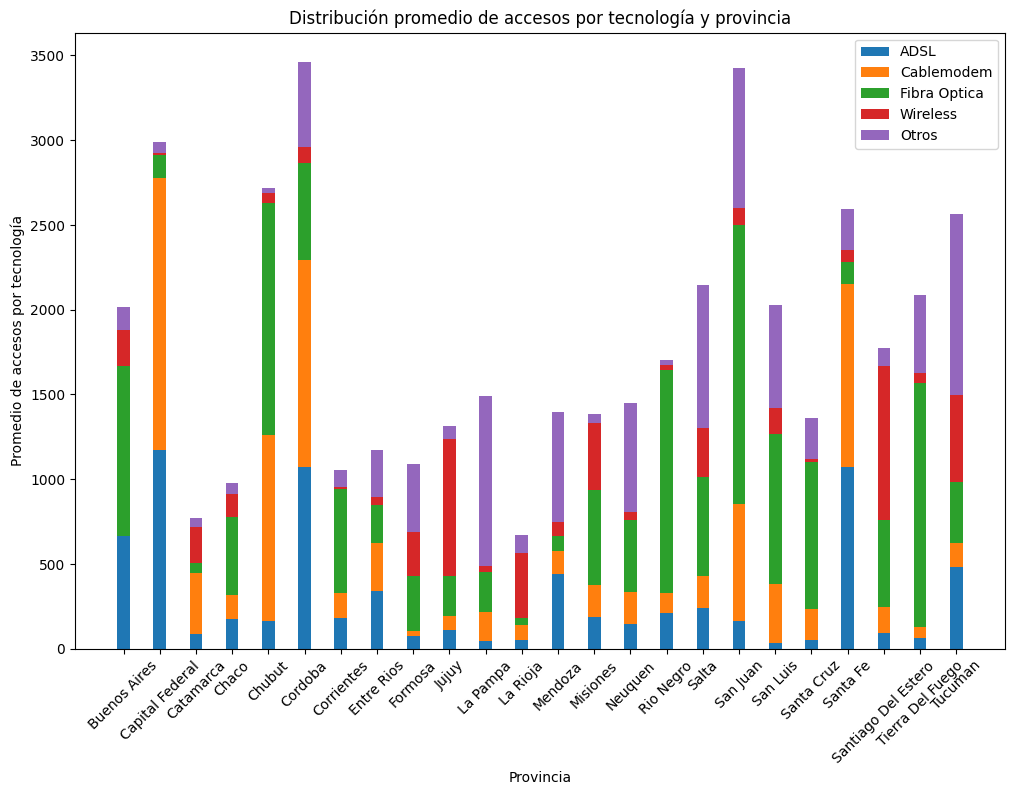

In [22]:
import matplotlib.pyplot as plt

# Calcular el promedio de las tecnologías por provincia
df_promedio = df_agrupado.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra Optica', 'Wireless', 'Otros']].mean().reset_index()

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.35  # Ancho de cada barra

# Obtener los valores de cada tecnología
adsl = df_promedio['ADSL']
cablemodem = df_promedio['Cablemodem']
fibra_optica = df_promedio['Fibra Optica']
wireless = df_promedio['Wireless']
otros = df_promedio['Otros']

# Crear las barras apiladas
p1 = ax.bar(df_promedio['Provincia'], adsl, width, label='ADSL')
p2 = ax.bar(df_promedio['Provincia'], cablemodem, width, bottom=adsl, label='Cablemodem')
p3 = ax.bar(df_promedio['Provincia'], fibra_optica, width, bottom=adsl+cablemodem, label='Fibra Optica')
p4 = ax.bar(df_promedio['Provincia'], wireless, width, bottom=adsl+cablemodem+fibra_optica, label='Wireless')
p5 = ax.bar(df_promedio['Provincia'], otros, width, bottom=adsl+cablemodem+fibra_optica+wireless, label='Otros')

# Personalizar el gráfico
ax.set_xlabel('Provincia')
ax.set_ylabel('Promedio de accesos por tecnología')
ax.set_title('Distribución promedio de accesos por tecnología y provincia')
ax.legend()

plt.xticks(rotation=45)
plt.show()


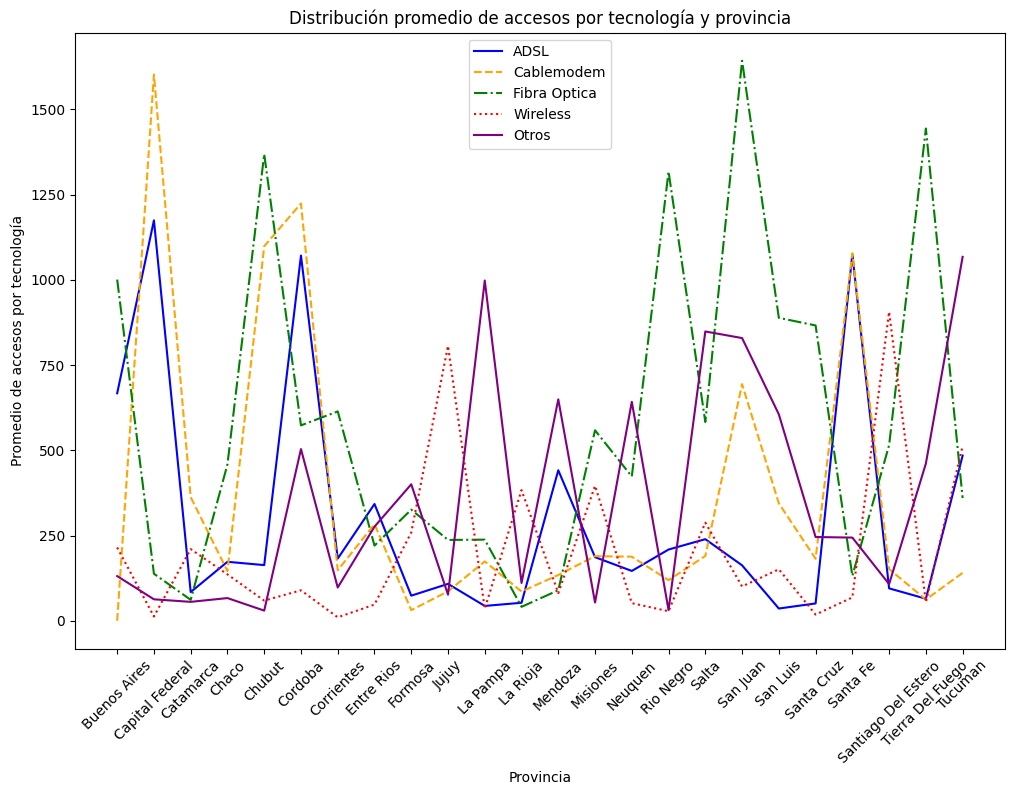

In [23]:
import matplotlib.pyplot as plt

# Calcular el promedio de las tecnologías por provincia
df_promedio = df_agrupado.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra Optica', 'Wireless', 'Otros']].mean().reset_index()

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 8))

# Definir los estilos de línea y colores
line_styles = ['-', '--', '-.', ':', '-']
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Iterar sobre las columnas de tecnologías y crear las líneas correspondientes
for i, columna in enumerate(['ADSL', 'Cablemodem', 'Fibra Optica', 'Wireless', 'Otros']):
    ax.plot(df_promedio['Provincia'], df_promedio[columna], linestyle=line_styles[i], color=colors[i], label=columna)

# Personalizar el gráfico
ax.set_xlabel('Provincia')
ax.set_ylabel('Promedio de accesos por tecnología')
ax.set_title('Distribución promedio de accesos por tecnología y provincia')
ax.legend()

plt.xticks(rotation=45)
plt.show()


In [6]:
#Se generan transformaciones de los tipos de datos antes de graficar 
df_accesos_por_velocidad['+ 1 Mbps - 6 Mbps'] = pd.to_numeric(df_accesos_por_velocidad['+ 1 Mbps - 6 Mbps'], errors='coerce')
df_accesos_por_velocidad['+ 30 Mbps'] = pd.to_numeric(df_accesos_por_velocidad['+ 30 Mbps'], errors='coerce')
df_accesos_por_velocidad['Total'] = pd.to_numeric(df_accesos_por_velocidad['Total'], errors='coerce')

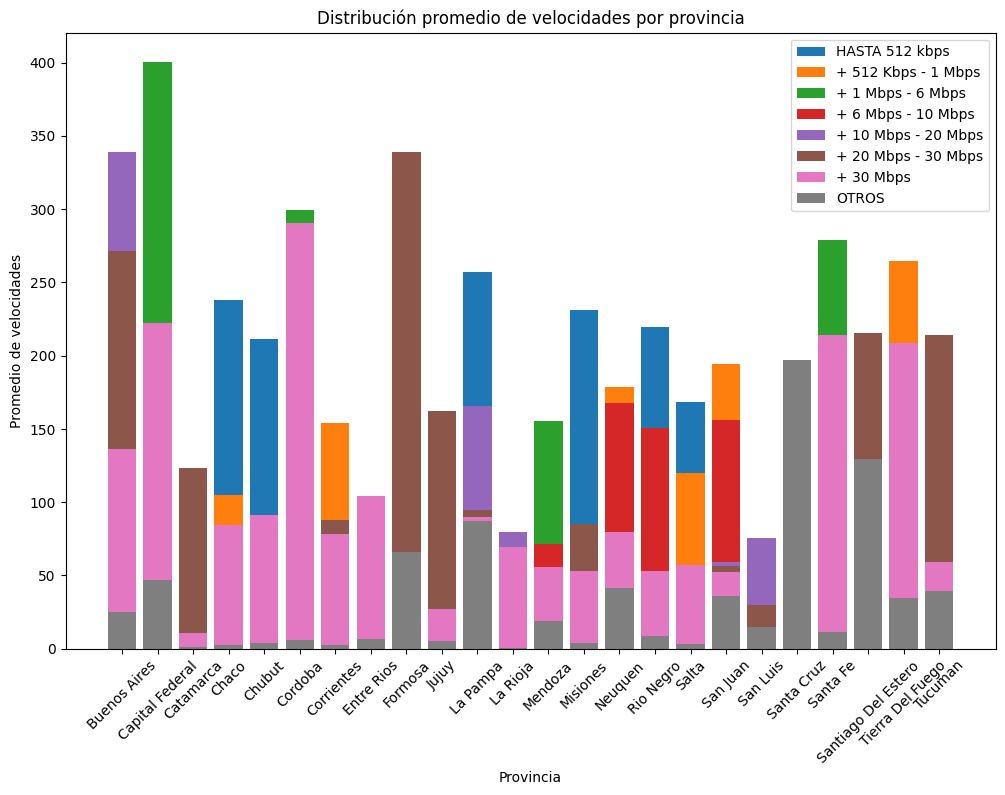

In [26]:
import matplotlib.pyplot as plt

# Calcular el df_accesos_por_velocidadpromedio de las velocidades por provincia
df_promedio =df_accesos_por_velocidad.groupby('Provincia')[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']].mean().reset_index()

# Obtener las provincias y los rangos de velocidad
provincias = df_promedio['Provincia']
rangos = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Obtener los valores de altura de las barras
valores = df_promedio[rangos].values.T

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))

# Definir la posición de las barras
posiciones = range(len(provincias))

# Crear las barras para cada rango de velocidad
for i, rango in enumerate(rangos):
    ax.bar(posiciones, valores[i], label=rango)

# Personalizar el gráfico
ax.set_xlabel('Provincia')
ax.set_ylabel('Promedio de velocidades')
ax.set_title('Distribución promedio de velocidades por provincia')
ax.legend()

# Establecer las etiquetas de las provincias en el eje x
ax.set_xticks(posiciones)
ax.set_xticklabels(provincias, rotation=45)

plt.show()


### Comportamiento de compra

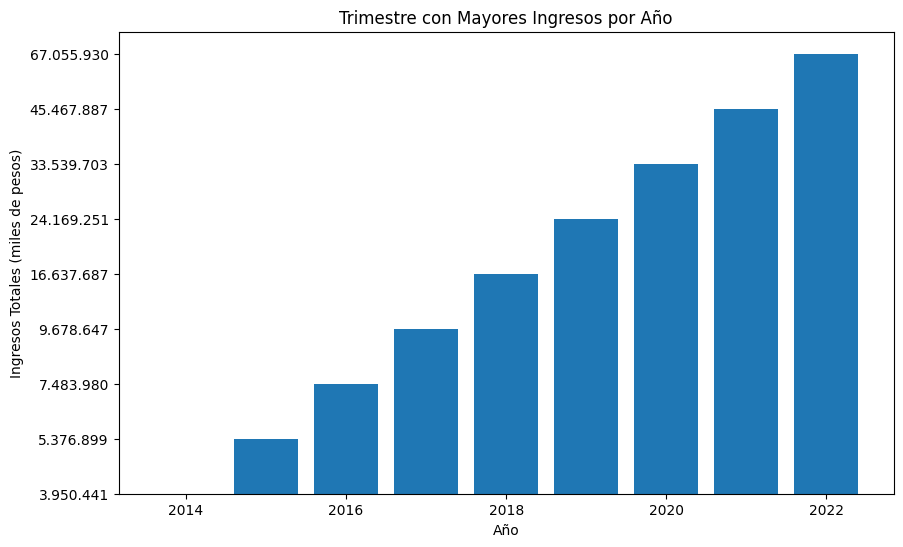

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("Internet_Ingresos.csv")

# Calcular los ingresos totales por trimestre y año
df["Ingresos Totales"] = df.groupby(["Year", "Trimestre"])["Ingresos (miles de pesos)"].transform("sum")

# Obtener el trimestre con mayores ingresos por año
df_max_ingresos = df.groupby("Year").apply(lambda x: x[x["Ingresos Totales"] == x["Ingresos Totales"].max()]).reset_index(drop=True)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_max_ingresos["Year"], df_max_ingresos["Ingresos Totales"])
plt.xlabel("Año")
plt.ylabel("Ingresos Totales (miles de pesos)")
plt.title("Trimestre con Mayores Ingresos por Año")
plt.show()


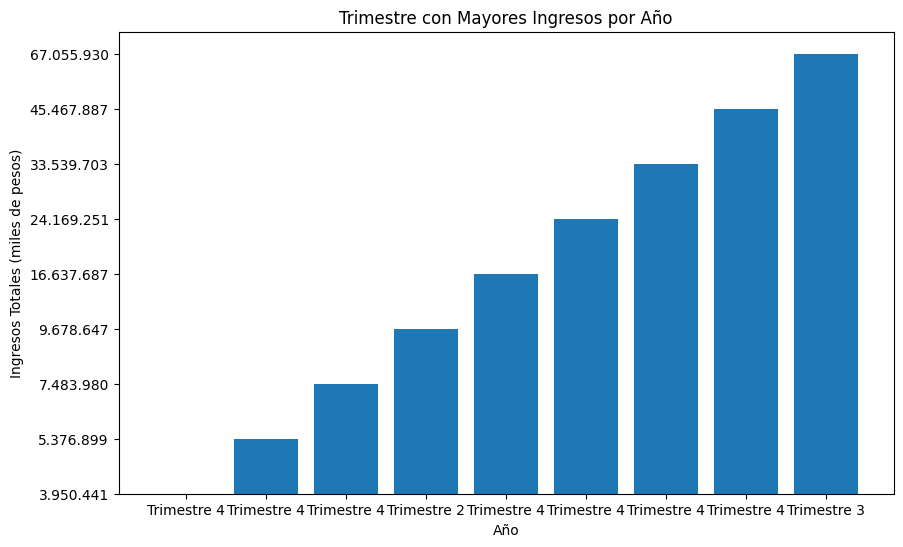

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("Internet_Ingresos.csv")

# Calcular los ingresos totales por trimestre y año
df["Ingresos Totales"] = df.groupby(["Year", "Trimestre"])["Ingresos (miles de pesos)"].transform("sum")

# Obtener el trimestre con mayores ingresos por año
df_max_ingresos = df.groupby("Year").apply(lambda x: x[x["Ingresos Totales"] == x["Ingresos Totales"].max()]).reset_index(drop=True)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_max_ingresos["Year"], df_max_ingresos["Ingresos Totales"])
ax.set_xlabel("Año")
ax.set_ylabel("Ingresos Totales (miles de pesos)")
ax.set_title("Trimestre con Mayores Ingresos por Año")

# Obtener los nombres de los trimestres
trimestres = {1: "Trimestre 1", 2: "Trimestre 2", 3: "Trimestre 3", 4: "Trimestre 4"}

# Establecer las etiquetas en el eje x
ax.set_xticks(df_max_ingresos["Year"])
ax.set_xticklabels([trimestres.get(trimestre) for trimestre in df_max_ingresos["Trimestre"]])

plt.show()


#### De todos los años el trimestre 4 es el que mas ingresos genera , en el año 2022 no tenemos datos del trimestre 4 por lo que solo marca el 3 como el mas alto 
Fin de año fiscal: El último trimestre del año marca el cierre del año fiscal para muchas compañías. En este período, las empresas pueden estar impulsadas a alcanzar o superar sus metas financieras y, por lo tanto, pueden aumentar sus esfuerzos de marketing en línea para atraer más clientes y generar mayores ingresos.

Cambios en el comportamiento del consumidor: Los consumidores pueden tener un cambio en su comportamiento de compra durante el último trimestre del año. Pueden estar más dispuestos a gastar en regalos y productos relacionados con la temporada festiva. Además, el crecimiento del comercio electrónico en general ha llevado a un aumento constante en las compras en línea durante todo el año.

In [11]:
import pandas as pd
tv_tecnologias= pd.read_csv("Tipos de tecnologia por hab y hogar.csv", delimiter= ";")

In [12]:
tv_tecnologias.head()

,Year,Trimestre,Accesos TV por suscripcion por cada 100 hab,Accesos TV satelital por cada 100 hab,Accesos TV por suscripcion por cada 100 hogares,Accesos TV satelital por cada 100 hogares
0,2022.0,3.0,16.56,4.46,52.97,14.27
1,2022.0,2.0,16.55,4.47,53.01,14.31
2,2022.0,1.0,16.41,4.45,52.61,14.25
3,2021.0,4.0,16.52,4.37,52.99,14.02
4,2021.0,3.0,16.73,4.68,53.72,15.03


In [9]:
tv_tecnologias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             35 non-null     float64
 1   Trimestre                                        35 non-null     float64
 2   Accesos TV por suscripcion por cada 100 hab      36 non-null     float64
 3   Accesos TV satelital por cada 100 hab            36 non-null     float64
 4   Accesos TV por suscripcion por cada 100 hogares  36 non-null     float64
 5   Accesos TV satelital por cada 100 hogares        36 non-null     float64
dtypes: float64(6)
memory usage: 1.8 KB
